# Overview
This assignment will enable you to practice with logistic regression, coding in Python, Loss functions (binary cross entropy in this case), learning rates, gradient descent and derivatives, activation function (sigmoid in this case), and drawing an architecture.

All concepts here will extend into perceptrons and ANNs with layers. For this reason, it is critical to gain a solid foundation, to practice, to code these concepts by hand (using an easy and small dataset), and to work through the math. 

All requirements, concepts, and math here will be on Exam 1.

This is an individual assignment. This means that you should do your own work and your submission should be yours alone. While it is OK to discuss concepts, it is not OK to duplicate work. If you ever have any questions about cheating, plagiarism, sharing, etc. please ask.

# (1) - Create Small 3D Dataset
Create your own small, 3D, labeled dataset. Your labels should be binary. Save your dataset as `A1_Data_YourName.csv`. You will be submitting this raw dataset with your Assignment. 

A 3D dataset has three columns (variables/features). The label will be in the 4th column. Recall that labels are not part of the dataset but rather are the categories (also called classes or groups) that each data row (example, observation) is a member of.  Your dataset should have 5 - 7 rows. Please invent the dataset BUT be sure that it makes sense. In other words, the labels should have a correlation with the data. You do not need to mathematically test the correlation :) just do it intuitively. 

All of your data must be numeric. The label (which is not part of the dataset) can be any binary label such as POS and NEG, YES and NO, BBPlayer and NotBBPlayer. There are an infinite number of options.

**JK:** 

See submitted *csv* file (named: `A1_Data_JasmineKobayashi.csv`)

# (2) - Linear Equation

## (a)
**Write out a general linear equation (call it $z$) to represent a linear function that multiplies individual weights by each $x$ value.** 

**Example: For a 4D dataset, a general linear equation is:**
**$z = w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + b $**

**JK:**

$$z = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$
$$ = \sum_{i=1}^n (w_ix_i) + b$$

for $n$-dimensional data (in other words, $n$ is number of data columns)

## (b)
Write your linear equation using vector format

Example:
$ z = \mathbf{w}^\intercal\mathbf{x} + b $

**JK:**

$$z = \mathbf{w}^\top \mathbf{x} + b$$

\begin{equation}
= 

\begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_n 
\end{bmatrix}
^\top

\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}

+

\begin{bmatrix}
b \\
b \\
\vdots \\
b
\end{bmatrix}
\end{equation}

\begin{equation}
=
\begin{bmatrix}
w_1 & w_2 & \cdots & w_n
\end{bmatrix}

\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}

+

\begin{bmatrix}
b \\
b \\
\vdots \\
b
\end{bmatrix}
\end{equation}


## (c)
What do the $w$ values represent?

**JK:** The $w$ values are parameters applied to the dimensions of the data, usually called "weights".

## (d)
What does the "$b$" represent?

**JK:** Often referred to as the "bias", $b$ is associated with an "intercept" of a linear equation. In other words, it is the value of the dependent variable when the independent variable(s) is/are all zero.

# (3) - Read and Visualize 3D Dataset
Use Python to read in your dataset and to plot the data (not the label) in 3D.

**Hint:** (This is an option, not the only option)
```
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
x1 = ....
x2 = ....
x3 = ....
# plotting
ax.scatter(x1, x2, x3, s=50)
ax.set_title('Dataset')
plt.show()
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# read data
data_file = 'A1_Data_JasmineKobayashi.csv'
df = pd.read_csv(data_file)
print(df)

   feat1  feat2  feat3 LABEL
0     22     10     24    No
1      5     12     52   Yes
2      3     15     59   Yes
3     25     11     23    No
4     23     14     21    No
5      8     19     54   Yes
6      4     13     57   Yes


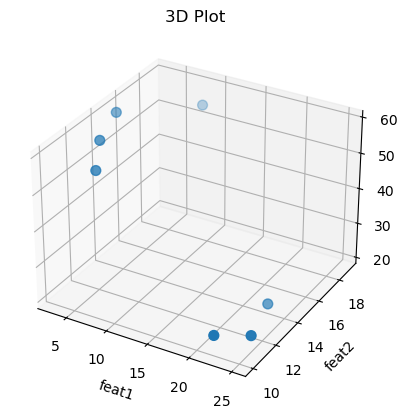

In [3]:
#%matplotlib widget
# above line is to make the plot interactive in VScode (need to pip install ipympl package if not in local machine already)
# If running this file in Anaconda's Jupyter, replace "widget" with "notebook"
# (or just comment out the line to view the standard static plot)

#plot data (not label)
fig = plt.figure()
ax = plt.axes(projection='3d')
# the following code is assuming first three columns are data ()
cols = df.columns
x1 = df[cols[0]]
x2 = df[cols[1]]
x3 = df[cols[2]]

# plotting
ax.scatter(x1, x2, x3, s=50)
ax.set_xlabel(cols[0])
ax.set_ylabel(cols[1])
ax.set_zlabel(cols[2])
ax.set_title('3D Plot')
plt.show()

# (4) - Data = obviously clustered?
Does your dataset appear to have clusters of groups? Does it appear to be separable - especially with respect to your labeling?

(Side note: If your data appears chaotic and/or does not appear separable with respect to your labeling, make adjustments to your dataset and do the above again. The goal here is to have an easy and simple dataset that will do what is expected.)

**JK:**
Yes, there appear to be apparent clusters.

# (5)- Sigmoid Function

## (a)
Write out the Sigmoid function - include both ways to write it.

**JK:** 

$$S(z) = \frac{e^z}{1+e^z} \\[6pt] = \frac{1}{1+e^{-z}} $$


## (b)
Prove that $\frac{1}{(1+e^{-x})}$ is the same as $\frac{e^x}{(1+e^x)}$ are the same. **Show all steps carefully.**

**JK:** *See submitted pdf of written answers to see step-by-step hand-written calculation.*

## (c)
Use Python to create a plot (from -100 to 100 with steps of 1) of the Sigmoid function. Inclue the plot here.

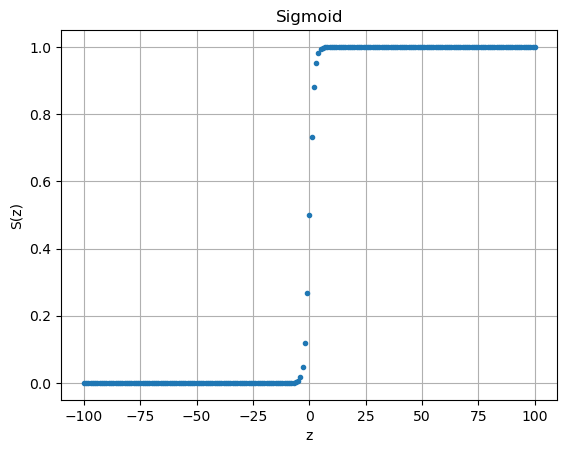

In [4]:
import math
x = np.arange(-100,101,1)   # np.arange doesn't include endpoint

def sig(z):
    return 1/(1+(math.e**(-z)))

# plot
fig2 = plt.figure() 
plt.plot(x,sig(x),'.')
plt.title('Sigmoid')
plt.xlabel('z')
plt.ylabel('S(z)')
plt.grid()
plt.show()

## (d)
Let $S(z) = \frac{1}{(1+e^{-z})}$ be the Sigmoid function. Prove that the first derivative of $S(z)$ is $S(z)*(1-S(z))$. **Show every step carefully.**

**JK:** *See submitted pdf of written answers.*

# (6) - Use small dataset for calculations by hand
Using your dataset and initial weight vector of all ones, an initial $b$ value of 0, do the following.

(Before you start, be sure to convert your labels to 0 and 1. For example, if my labels are POS and NEG, then I can change all POS to 1 and all NEG to 0.)

**Required: for the following, do this in vector/matrix form.** (Example on Canvas assignment page)

In [5]:
# data dimensions (to make weight vector creation flexible to data with different dimensions)
data_dimension = df.shape[1] - 1   #"data" doesn't include label, so dimension is # of cols minus 1
print('dimension of data =',data_dimension)

# weight vector (of all ones)
w = np.array([[1]]*data_dimension)     # weight vector (of ones) of length = dimension of data
print('weight vector (w):\n',w)

# bias (b)
b = 0
print('bias(b) =',b)

dimension of data = 3
weight vector (w):
 [[1]
 [1]
 [1]]
bias(b) = 0


## (a)
What is your weight vector? Show it here. (You can draw it if you wish)

**JK:** I did "draw" the weight vector also. See submitted pdf of written answers.

In [6]:
print('weight vector (w):\n',w)
print('shape of weight vector:',w.shape)

# (not asked for this question, just nice info) 
# transpose of weight vector
print('transpose of w:',w.T)
print('shape of transpose:',w.T.shape)

weight vector (w):
 [[1]
 [1]
 [1]]
shape of weight vector: (3, 1)
transpose of w: [[1 1 1]]
shape of transpose: (1, 3)


## (b)
Use your weight vectors of all ones and your $b$ of 0 and your dataset to calculate z for all of your data. **Show every step and do this by hand.**

**JK:** 

I'm scaling the data (for $\mathbf{X}$) here because I'm not patient enough to scale data by hand (and it's not asked to be done by the question).

But just to show I know how to scale (and just because it's generally useful information), I'll display the "formula" for the scaling used here (min-max) which would've hypothetically been applied to every value in each column of the data.

Min-max scaling:
$$x' = \frac{x - min}{max - min}$$

Where $x'$ is the scaled value, $x$ is the value to scale. ($min$ & $max$ are the minimum value and maximum value of the list of values to scale to.)

In [7]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
scale_data = mm_scaler.fit_transform(df[cols[0:-1]])

print("Min-max scaled data:\n", pd.DataFrame(scale_data,columns=cols[0:-1]))

Min-max scaled data:
       feat1     feat2     feat3
0  0.863636  0.000000  0.078947
1  0.090909  0.222222  0.815789
2  0.000000  0.555556  1.000000
3  1.000000  0.111111  0.052632
4  0.909091  0.444444  0.000000
5  0.227273  1.000000  0.868421
6  0.045455  0.333333  0.947368


*See submitted pdf of written answers to see step-by-step hand-written calculation.* 

## (c)
Once you have your $z$ values, apply the Sigmoid function to each and show your $\hat{y}=S(x)$ vector. **Do this by hand and show every step.**

**JK:** *See submitted pdf of written answers to see step-by-step hand-written calculation.*

## (d)
Are your current parameters ($\mathbf{w}$ and $b$) doing a good job predicting the correct labels? Show the correct label ($y$) and the predicted label ($\hat{y}$). How many are incorrect? 

(Note that $\hat{y}$ is pronounced y hat and is the value predicted by applying the Sigmoid to the linear equation).

**Show all your work.**

**JK:** *See submitted pdf of written answers to see step-by-step hand-written calculation.*

## (e)
What can you do to improve your predictions? In other words, what can you do to reduce the differences between the $y$ (the known label) and the $\hat{y}$ (predicted value)?

**JK:**

To improve predictions, we want to find a way to "measure" how well the model performs and optimize it. One way to do this is to measure the "error" (difference) between predicted and true values and *optimize* it by minimizing that difference. (This is method is known as minimizing the loss function in the topic of neural networks.)

# (7) - (Binary) Cross Entropy Loss Function

## (a)
Write out the cross-entropy function for binary labels here.

$L_{CE} (y,\hat{y}) = $ ...

$$-\frac{1}{m} \sum_i^m ylog(\hat{y}) + (1-y)log(1-\hat{y})$$

(Also handwritten on pdf of written answers.)

## (b)
For all of your data rows, calculate the $L_{CE}$. **Show all of your work and do this by hand. Include ALL steps.** Continue to use the weight vector of all ones and a $b$ of 0.

**JK:** *See submitted pdf of written answers to see step-by-step hand-written calculation.*

## (c)
Using your result from **(b)**, what would you say your current "Loss" or "error" is? How might you improve/reduce this? What does it mean if the $L_{CE}$ is 0?

**JK:** *See submitted pdf of written answers.* 

# (8) - Play with parameters
To reduce the error (or loss), we need to adjust (change) the parameters. Recall that in this case, our parameters are $\mathbf{w}$ and $b$. If we change the values of $\mathbf{w}$ and/or $b$, this will result in a change in the $L_{CE}$ and the overall difference between $\hat{y}$ and $y$.

Do this by hand.

Change your $\mathbf{w}$ to values other than 1. Leave $b$ as 0. Recalculate $L_{CE}$.

**Show every step and all of your work. Do this by hand. Your $\mathbf{w}$ values are invented by you.**

**JK:** *See submitted pdf of written answers to see step-by-step hand-written calculation.*

# (9) - Gradients (aka Jacobian): Partial Derivatives
To make changes to parameters, such as $\mathbf{w}$ and $b$ so that we get closer and closer to the minimum (in other words to optimize the values of $\mathbf{w}$ and $b$) we need to take the partial derivatives of $L_{CE}$ with respect to both $\mathbf{w}$ and $b$. The **Jacobian** is a vector or matrix that contains all partial derivatives of a function with respect to all possible parameters. Here, our Jacobian has two values, one for $\frac{\partial L_{CE}}{\partial b}$, where "$\partial$" here is partial derivative.

## (a)
Find the partial derivative of the $L_{CE}$ with respect to $\mathbf{w}$. **Show all steps and work and use the chain rule. HINT (chain rule): $\frac{\partial L_{CE}}{\partial \mathbf{w}} = \frac{\partial L_{CE}}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial z} * \frac{\partial z}{\partial \mathbf{w}}$**

HINT2: The two derivatives are:

$\frac{\partial L_{CE}}{\partial \mathbf{w}} = \frac{1}{n} (\hat{y}-y)^{\intercal} \mathbf{x}$

$\frac{\partial L_{CE}}{\partial b} = \frac{1}{n} (\hat{y} - y)$

You will be graded on the work as you already have the final answer :)

**JK:** *See submitted pdf of written answers to see step-by-step hand-written calculation.*

## (b)
In words, how would you describe the derivatives here? What do that "mean"? (3-4 sentences is enough)

**JK:** 

# (10) - Update parameters using Gradient

## (a)
Using $\frac{\partial L_{CE}}{d \mathbf{w}} = \frac{1}{n} (\hat{y}-y)^\intercal \mathbf{x}$ and using the original $\mathbf{w}$ of all ones, calculate and update $\mathbf{w}$.

**Show all of the work and do this by hand vector style** (For now we will assume that the learning rate, `LR`, is 1.)

(Example on Canvas assignment page)

**JK:** *See submitted pdf of written answers to see step-by-step hand-written calculation.*

## (b)
Once you update $\mathbf{w}$ and keeping $b$ as 0, recalculate $L_{CE}$ and compare your new $L_{CE}$ to the original $L_{CE}$. Did it reduce? **Show all work and steps and do this by hand.**

**JK:** *See submitted pdf of written answers to see step-by-step hand-written calculation.*

# (11) - Code Everything from Scratch
Code logistic regression using Python. DO NOT use a "package" but rather, code it by hand. Yes you can use simple packages like `NumPy`, etc. You cannot use a Logistic regression package.

You must write code that will:

(a) Read in any `.csv` labeled dataset where the Label is called "LABEL".

(b) Your code should create "$y$" (the label) as a numpy array of 0 and 1. So, if the labels are originally something POS and NEG, your code will need to determine this, and then update all POS to 1 and all NEG to 0. Your code should be able to do this for any two label options.

(c) Your code will also create $X$ which is the entire dataset (without the labels) as a numpy array.

(d) Your code will initialize $\mathbf{w}$ and $b$ and a learning rate. 

(e) Your code will need to contain a function for Sigmoid and for z, etc.

(f) Your code will then need to perform gradient descent to optimize (reduce) $L_{CE}$.

(g) Be sure that your code can run interatively for as many epochs as you wish.

(h) Show a final confusion matrix (see example below) AND show a graph of how the $L_{CE}$ reduces as epochs iterate (see example on Canvas assignment page).

**Recommended:** Use your code to see if your by-hand results from above are right. The goal here is to really understand all the steps, which steps are repeated (epochs), the loss function ($L_{CE}$ here), the activation function (Sigmoid here), updating the parameters, etc.

Here is [example code I wrote](https://gatesboltonanalytics.com/?page_id=873). I strongly suggest NOT using this code first - but rather - try to understand the above and write your own code from scratch. If you get stuck, you can use my code as a reference.

(All "I" and "my" are referring to Dr. Gates who wrote the problem.)

**Hint:**

```
cm = confusion_matrix(labels, Prediction)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')  
#annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Not BB Player", "BB Player"])
ax.yaxis.set_ticklabels(["Not BB Player", "BB Player"])
```

## Code (nitty-gritty step-by-step, cell-by-cell)

In [8]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import confusion_matrix  
import seaborn as sns

### Read data & create X/y

In [9]:
df = pd.read_csv('A1_Data_JasmineKobayashi.csv')    # requirement (a)

# X matrix
X = np.array(df.drop(columns=['LABEL'],axis=1))     # requirement (c)
print("X:\n", X)
print("Shape of X:", X.shape)

# y
encode = LabelEncoder()
y = np.array([encode.fit_transform(df['LABEL'])])   # requirement (b)
print()
print("y: \n", y)
print("Shape of y:", y.shape)


X:
 [[22 10 24]
 [ 5 12 52]
 [ 3 15 59]
 [25 11 23]
 [23 14 21]
 [ 8 19 54]
 [ 4 13 57]]
Shape of X: (7, 3)

y: 
 [[0 1 1 0 0 1 1]]
Shape of y: (1, 7)


### Initialize Parameters (weight vector, bias, and Learning Rate)

In [10]:
# initialize  parameters and other variables (requirement (d))

## initialize weight vector, w, of all ones
w = np.array([[1]]*(df.shape[1] - 1))   # assuming all columns other than LABEL are data columns
print("weight vector, w: \n",w)
print("Shape of w:",w.shape)

## initialize b = 0
b = 0

## initialize Learning Rate
LR = 1


weight vector, w: 
 [[1]
 [1]
 [1]]
Shape of w: (3, 1)


### Normalizing (not required)
not required for the assignment but helps later on

In [11]:
# not required, but min-max noramlizing X 
# (especially to make it comparable with written work)
scale_data = True
if scale_data:
    mm_scaler = MinMaxScaler()
    X = mm_scaler.fit_transform(df.drop(columns="LABEL",axis=1))
    print("Min-max scaled data:\n", X)
    print("Shape of scaled X:",X.shape)


Min-max scaled data:
 [[0.86363636 0.         0.07894737]
 [0.09090909 0.22222222 0.81578947]
 [0.         0.55555556 1.        ]
 [1.         0.11111111 0.05263158]
 [0.90909091 0.44444444 0.        ]
 [0.22727273 1.         0.86842105]
 [0.04545455 0.33333333 0.94736842]]
Shape of scaled X: (7, 3)


### Functions (Linear eq & Sigmoid)

In [12]:
# Functions (requirement (e))

## Linear equation z
def lin_eq(X,w,b):       # requires shapes of inputted parameters to be correct
    return X @ w + b

z = lin_eq(X,w,b)
print("z: \n",z)
print("Shape of z:",z.shape)

## Sigmoid function
def Sigmoid(z):
    return 1/(1+math.e**(-z))

y_hat = Sigmoid(z)
print()
print("S(z) = y^: \n",y_hat)
print("Shape of y^:", y_hat.shape)


z: 
 [[0.94258373]
 [1.12892079]
 [1.55555556]
 [1.16374269]
 [1.35353535]
 [2.09569378]
 [1.3261563 ]]
Shape of z: (7, 1)

S(z) = y^: 
 [[0.71962126]
 [0.75563968]
 [0.82571468]
 [0.76201212]
 [0.79470701]
 [0.89048393]
 [0.79020413]]
Shape of y^: (7, 1)


### Gradient Descent

In [13]:
# Gradient Descent (requirement (f))
## Partial derivatives
print(y_hat.shape)
#print(y_hat)
print(y.shape)
#print(y.T)
print(y.T.shape,"\n")

error = y_hat-y.T
print("y^-y =\n",error)

### dL/dw = (1/n)(y^-y)*X
dL_dw = (1/(df.shape[0]))*(error.T@X)
print("dL/dw =",dL_dw,"\n")

### dL/db = (1/n)(y^-y)
dL_db = (1/(df.shape[0]))*error
print("dL/db =",dL_db)
### if want a single value for b to use, 
### there are a number of ways to select which value to use
### Dr. Gates used the average in her code (but that's not the only option)


(7, 1)
(1, 7)
(7, 1) 

y^-y =
 [[ 0.71962126]
 [-0.24436032]
 [-0.17428532]
 [ 0.76201212]
 [ 0.79470701]
 [-0.10951607]
 [-0.20979587]]
dL/dw = [[ 0.29276048  0.01532795 -0.08151055]] 

dL/db = [[ 0.10280304]
 [-0.03490862]
 [-0.0248979 ]
 [ 0.10885887]
 [ 0.11352957]
 [-0.01564515]
 [-0.02997084]]


In [14]:
# functions for ease of gradient descent

def grad_desc(y_hat,y,X):
    error = y_hat-y.T
    m = X.shape[0]
    
    dL_dw = (1/m)*(error.T@X)
    dL_db = (1/m)*error
    dL_db = np.mean(dL_db)
    return dL_dw.T, dL_db



### Loss Function (LCE)

In [15]:
def LCE(y_hat,y):
    m = y_hat.shape[0]
    summation = np.sum(y.T*np.log(y_hat)+((1-y.T)*np.log(1-y_hat)))
    return (-1/m)*summation

print("loss =",LCE(y_hat,y))

loss = 0.730516772865319


### Repeat for multiple (# of epochs) iterations

In [16]:
epochs = 20

Lce_list = []

for i in range(epochs):
    dL_dw,dL_db = grad_desc(y_hat,y,X)

    w = w - LR*dL_dw
    b = b - LR*dL_db

    z = lin_eq(X,w,b)

    y_hat = Sigmoid(z)

    Lce_list.append(LCE(y_hat,y))

### Visualization (Confusion Matrix and Lce Plot)

In [17]:
prediction = y_hat
prediction[y_hat >= .5] = 1
prediction[y_hat < .5] = 0
print(prediction)

[[0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]]


In [18]:
labels = y.T
print(labels)

[[0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]]


[[3 0]
 [0 4]]


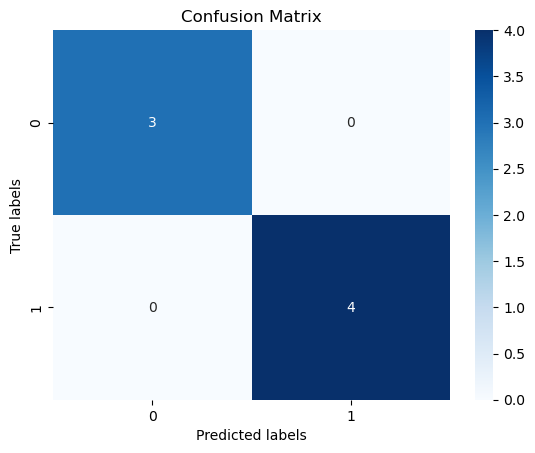

In [19]:
# Confusion matrix (requirement (h))
cm = confusion_matrix(labels, prediction)
print(cm)
plt.figure()
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')  
#annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["0", "1"])
ax.yaxis.set_ticklabels(["0", "1"])
plt.show()

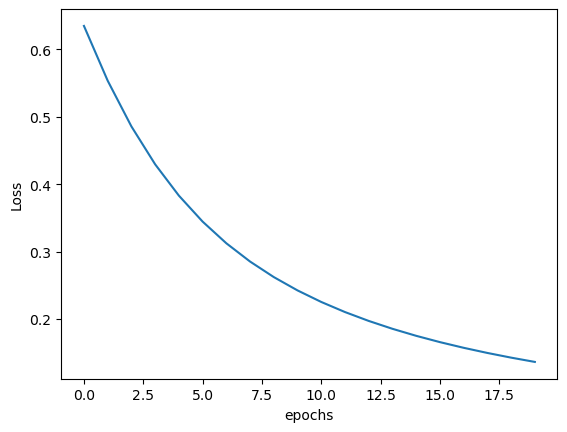

In [20]:
# plot of Lce (requirement (h) cont.)
plt.figure()
plt.plot(np.arange(0,epochs,1),Lce_list,'-')
plt.xlabel("epochs")
plt.ylabel('Loss')
plt.show()

## Code via object-oriented python script

**JK:** I also created a python script file creating a simple object-oriented code

Note: The figures might not show up properly due to the `%matplotlib widget` code I have several code cells above, but if you run the python script in a separate notebook or terminal and run the following code it should work (with some other adjustable parameters). 

finished running all epochs
[[3 0]
 [0 4]]


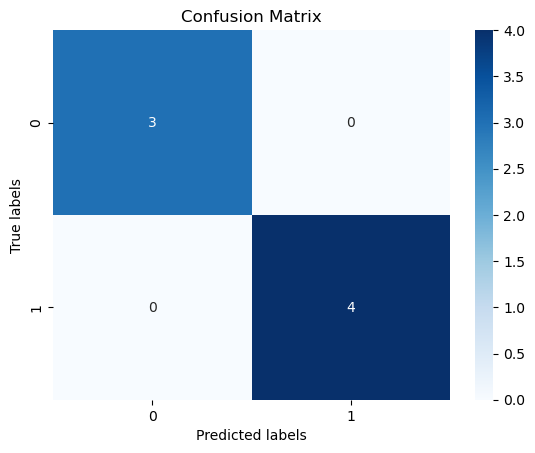

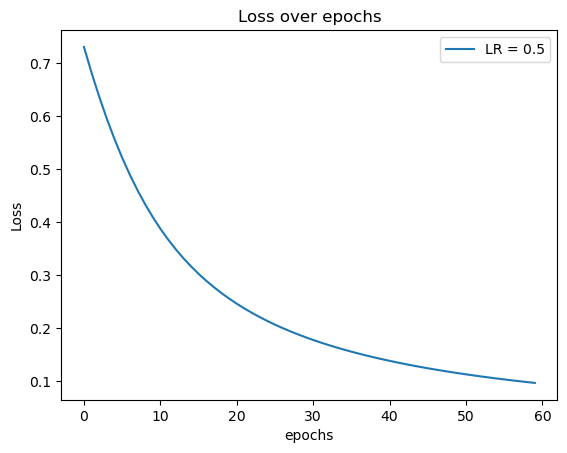

In [22]:
import HW1_log_reg as lr
HW1 = lr.log_reg('A1_Data_JasmineKobayashi.csv',epochs=60,LR=0.5)
HW1.run_model(print_all_params=False)